In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow

In [44]:
T = np.pi * 2
def colorize(t, T):
    c1 = t/T
    r = int(c1*255)
    return (r, 255-r, 0)

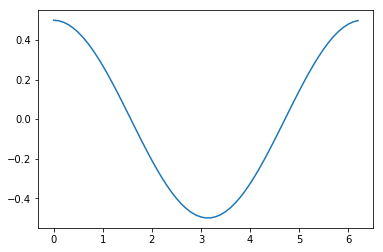

In [87]:
x = np.arange(0, 2*np.pi, 0.1)
y = [0.5*np.cos(t) for t in x]
plt.plot(x, y)

In [88]:
# Port coordinates to image positions
W=300.
H=200.
C=3
x_coord = [int(coord) for coord in x/(2*np.pi) * W]
y_coord = [int(coord) for coord in ((y+np.ones(len(y)))/2) * H]

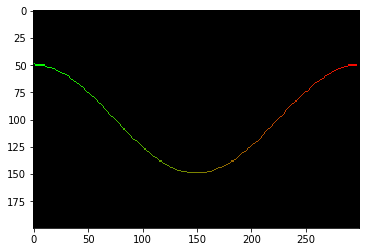

In [92]:
def create_colorized_traj_img(height, width, x_coord, y_coord):
    img = Image.new('RGB', (int(width), int(height)), (0, 0, 0))
    draw = ImageDraw.Draw(img)
    num_steps = len(x_coord)
    for t in range(1, num_steps):
        color = colorize(t-1, num_steps)
        x1, x2 = int(min(x_coord[t-1], width-1)), int(min(x_coord[t], width-1))
        y1, y2 = int(min(y_coord[t-1], height-1)), int(min(y_coord[t], height-1))
        draw.line((x1, y1, x2, y2), fill=color)
    return img.transpose(Image.FLIP_TOP_BOTTOM)

imshow(create_colorized_traj_img(H, W, x_coord, y_coord))